In [2]:
import pandas as pd
import os

# 이동평균선을 활용한 상권 유형 구분하기

In [3]:
df =pd.read_csv('행정동_요인분석/sum_fa_list.csv',encoding='euc-kr')
df_base = df.iloc[:,:5]
df=df.iloc[:,5:]

In [4]:
df_moving_avr = df.rolling(window=5,axis=1).mean()
df_moving_avr.dropna(axis=1,inplace=True)

In [5]:
df_moving_avr

,1912_score,2006_score,2012_score,2106_score,2112_score,2206_score
0,0.246246,0.248293,0.247850,0.248038,0.250542,0.250646
1,0.284114,0.285426,0.285951,0.287097,0.289391,0.294034
2,0.378694,0.377890,0.372559,0.371649,0.370168,0.366256
3,0.382305,0.379825,0.374358,0.375940,0.375865,0.373773
4,0.307081,0.307132,0.307745,0.307797,0.306671,0.308324
...,...,...,...,...,...,...
543,0.211866,0.216600,0.218434,0.217858,0.216249,0.213980
544,0.219379,0.223928,0.225276,0.225088,0.222548,0.220721
545,0.235247,0.238548,0.240278,0.239772,0.237073,0.235780
546,0.278225,0.276958,0.280950,0.283777,0.285214,0.289111


In [6]:
df = df.iloc[:,4:]

In [7]:
df_active = df-df_moving_avr

array([[<AxesSubplot:title={'center':'1912_score'}>,
        <AxesSubplot:title={'center':'2006_score'}>],
       [<AxesSubplot:title={'center':'2012_score'}>,
        <AxesSubplot:title={'center':'2106_score'}>],
       [<AxesSubplot:title={'center':'2112_score'}>,
        <AxesSubplot:title={'center':'2206_score'}>]], dtype=object)

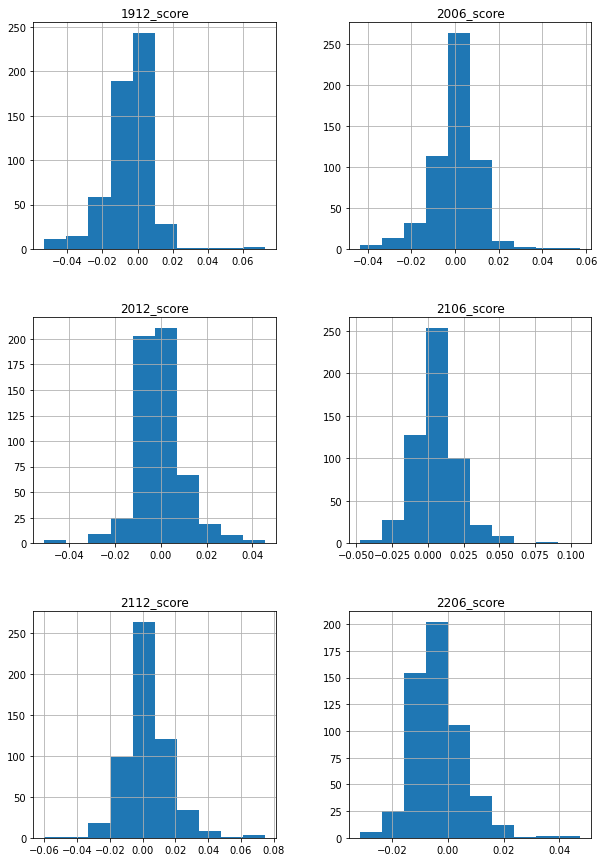

In [8]:
df_active.hist(figsize=(10,15),bins=10)

# 상권 유형 구분

In [9]:
def type_func(x):
    if x >= 0.015:
        return '성장'
    elif x<= -0.005:
        return '쇠퇴'
    else: return '정체'

In [10]:
def type_func2(x):
    if (np.sum(x=='성장')>=3):
        return '성장'
    elif (np.sum(x=='쇠퇴')>=3):
        return '쇠퇴'
    else :
        return '정체'

In [11]:
df_active

,1912_score,2006_score,2012_score,2106_score,2112_score,2206_score
0,-0.002143,0.003336,-0.006389,0.007690,0.009246,-0.006023
1,-0.010760,-0.003408,0.002393,0.013677,0.013075,0.002533
2,-0.004748,-0.000435,-0.006808,-0.001779,-0.006348,-0.011872
3,-0.008590,0.000271,-0.005121,0.007001,-0.002527,-0.010518
4,-0.005316,-0.014551,-0.005937,0.012797,0.009936,0.001706
...,...,...,...,...,...,...
543,0.002632,0.005652,-0.004070,0.000203,-0.004178,-0.010828
544,0.001409,0.004544,-0.004927,-0.000909,-0.003595,-0.009071
545,-0.000299,0.000405,-0.003253,0.001700,-0.004106,-0.007298
546,-0.017320,-0.005956,0.009862,0.024650,0.009709,-0.008718


In [12]:
for i in range(len(df_active.columns)):
    df_active[df_active.columns[i][:4]+'_유형'] = df_active.iloc[:,i].apply(lambda x : type_func(x))       

In [13]:
import numpy as np
df_count = df_active.iloc[:,6:]
df_count['상권유형'] = df_count.apply(lambda x: type_func2(x),axis=1)

In [14]:
df_count

,1912_유형,2006_유형,2012_유형,2106_유형,2112_유형,2206_유형,상권유형
0,정체,정체,쇠퇴,정체,정체,쇠퇴,정체
1,쇠퇴,정체,정체,정체,정체,정체,정체
2,정체,정체,쇠퇴,정체,쇠퇴,쇠퇴,쇠퇴
3,쇠퇴,정체,쇠퇴,정체,정체,쇠퇴,쇠퇴
4,쇠퇴,쇠퇴,쇠퇴,정체,정체,정체,쇠퇴
...,...,...,...,...,...,...,...
543,정체,정체,정체,정체,정체,쇠퇴,정체
544,정체,정체,정체,정체,정체,쇠퇴,정체
545,정체,정체,정체,정체,정체,쇠퇴,정체
546,쇠퇴,쇠퇴,정체,성장,정체,쇠퇴,쇠퇴


# 상권 활성화여부 도출

In [15]:
df2 = pd.read_csv('행정동_요인분석/sum_fa_list.csv',encoding='euc-kr')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled_standard = scaler.fit_transform(df2.iloc[:,5:])
score_set = pd.DataFrame(df_scaled_standard,columns=df2.iloc[:,5:].columns)

In [16]:
score_set

,1712_score,1806_score,1812_score,1906_score,1912_score,2006_score,2012_score,2106_score,2112_score,2206_score
0,-0.565088,-0.663678,-0.614521,-0.696573,-0.634717,-0.621020,-0.760227,-0.661342,-0.550662,-0.694506
1,-0.159623,-0.135541,-0.056967,-0.085317,-0.226883,-0.193639,-0.093445,-0.022493,0.049172,0.038573
2,1.102323,1.204485,1.042459,1.036208,1.175589,1.148522,1.007465,0.957448,0.911510,0.854518
3,1.233546,1.256804,1.050925,1.070978,1.172381,1.185662,1.057048,1.142819,1.045292,0.979714
4,0.041154,0.028063,0.293321,0.351407,0.169231,-0.045089,0.098051,0.258610,0.247923,0.228569
...,...,...,...,...,...,...,...,...,...,...
543,-1.074704,-1.146992,-1.083317,-1.076205,-1.047468,-1.034137,-1.145614,-1.195551,-1.221322,-1.279758
544,-0.989617,-1.041301,-1.025499,-0.914880,-0.959774,-0.946666,-1.060500,-1.108788,-1.124599,-1.159835
545,-0.790617,-0.855811,-0.763974,-0.707842,-0.762347,-0.799272,-0.823326,-0.863519,-0.927626,-0.922287
546,-0.137220,-0.322265,-0.067412,-0.130849,-0.400450,-0.348554,-0.058351,0.086037,-0.056842,-0.189675


In [17]:
bins=[]
for i in reversed(range(1,11)):
    bins.append(str(i)+'등급')

In [18]:
def split_type(x):
    answer = ''
    if x >= 0.5 : answer = '활성'
    elif x<=-0.5 : answer = '침체'
    else : answer = '일반'
    return answer

In [19]:
score_set['활성화여부'] = score_set['1712_score'].apply(lambda x : split_type(x))

In [20]:
score_set.head(2)

,1712_score,1806_score,1812_score,1906_score,1912_score,2006_score,2012_score,2106_score,2112_score,2206_score,활성화여부
0,-0.565088,-0.663678,-0.614521,-0.696573,-0.634717,-0.621020,-0.760227,-0.661342,-0.550662,-0.694506,침체
1,-0.159623,-0.135541,-0.056967,-0.085317,-0.226883,-0.193639,-0.093445,-0.022493,0.049172,0.038573,일반


# 데이터 결합

In [21]:
#활성화여부,상권유형 결합
df_base = pd.concat([df_base,score_set.iloc[:,-1]],axis=1)
df_base = pd.concat([df_base,df_count.iloc[:,-1]],axis=1)

In [22]:
df_base['상권활성화유형']= df_base['활성화여부']+'-'+df_base['상권유형']
df_base.head(2)

,WKT,시도,SIGUNGU_NM,ADM_DR_NM,시군구코드,활성화여부,상권유형,상권활성화유형
0,MULTIPOLYGON (((956144.676799997 1926791.06500...,경기도,수원시 장안구,파장동,41111560.0,침체,정체,침체-정체
1,"MULTIPOLYGON (((953430.847600002 1923415.439,9...",경기도,수원시 장안구,율천동,41111566.0,일반,정체,일반-정체


# 현재 상권활성도 등급 결합

In [23]:
FA_2206 = pd.read_csv('행정동_요인분석/FA_adm_202206.csv',encoding='euc-kr')
FA_2206.iloc[:,-2:]

,2206_절대등급,2206_상대등급
0,9,8
1,8,5
2,6,3
3,6,2
4,7,4
...,...,...
543,10,10
544,10,9
545,9,9
546,8,6


In [24]:
df_base = pd.concat([df_base,FA_2206.iloc[:,-2:]],axis=1)

# 상권 회복도 결합

In [25]:
eco_recover=pd.read_csv('행정동_컬럼/행정동_경제회복도.csv',encoding='euc-kr')
boa = pd.read_csv('행정동_컬럼/행정동_업력.csv',encoding='euc-kr')

In [26]:
boa=boa[['시군구코드','업력']]

In [27]:
df_base =pd.merge(left=df_base,right=eco_recover,how='inner',on='시군구코드')
df_base =pd.merge(left=df_base,right=boa,how='inner',on='시군구코드')


In [28]:
df_base

,WKT,시도,SIGUNGU_NM,ADM_DR_NM,시군구코드,활성화여부,상권유형,상권활성화유형,2206_절대등급,2206_상대등급,경제회복도,업력
0,MULTIPOLYGON (((956144.676799997 1926791.06500...,경기도,수원시 장안구,파장동,41111560.0,침체,정체,침체-정체,9,8,6,12.667998
1,"MULTIPOLYGON (((953430.847600002 1923415.439,9...",경기도,수원시 장안구,율천동,41111566.0,일반,정체,일반-정체,8,5,6,10.305972
2,"MULTIPOLYGON (((954598.361899999 1923627.5777,...",경기도,수원시 장안구,정자1동,41111571.0,활성,쇠퇴,활성-쇠퇴,6,3,8,11.754494
3,"MULTIPOLYGON (((955513.584699999 1922196.6204,...",경기도,수원시 장안구,정자2동,41111572.0,활성,쇠퇴,활성-쇠퇴,6,2,7,11.894814
4,"MULTIPOLYGON (((958087.7235 1922275.02,958080....",경기도,수원시 장안구,영화동,41111580.0,일반,쇠퇴,일반-쇠퇴,7,4,7,14.440856
...,...,...,...,...,...,...,...,...,...,...,...,...
543,"MULTIPOLYGON (((1022538.551 1954630.9803,10225...",경기도,양평군,청운면,41830370.0,침체,정체,침체-정체,10,10,7,14.339326
544,"MULTIPOLYGON (((1018405.9698 1946478.1428,1018...",경기도,양평군,양동면,41830380.0,침체,정체,침체-정체,10,9,7,12.270694
545,"MULTIPOLYGON (((1011829.8535 1945324.8923,1011...",경기도,양평군,지평면,41830395.0,침체,정체,침체-정체,9,9,7,11.723183
546,"MULTIPOLYGON (((1009252.2599 1953485.9096,1009...",경기도,양평군,용문면,41830400.0,일반,쇠퇴,일반-쇠퇴,8,6,6,11.936345


# 최종 저장

In [29]:
df_base.to_csv('행정동_결과물/상권활성도_최종.csv',encoding='euc-kr',index=False)